In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [19]:
# Parameters
omega1 = 1
omega2 = 1
epsilon = 1
a = 0.2
b = 0.2
c = 5.7

# Coupled system
def coupled_system(x1, x2, x3, y1, y2, y3, omega1, omega2, epsilon):
    # x system
    dx1dt = -omega1 * x2 - x3
    dx2dt = omega1 * x1 + a * x2
    dx3dt = b + x3 * (x1 - c)
    
    # y system
    dy1dt = -omega2 * y2 - y3 + epsilon * (x1 - y1)
    dy2dt = omega2 * y1 + a * y2
    dy3dt = b + y3 * (y1 - c)
    
    return np.array([dx1dt, dx2dt, dx3dt, dy1dt, dy2dt, dy3dt])

# Runge-Kutta 4th order method
def rk4_step(func, r, t, h, *args):
    k1 = h * func(*r, *args)
    k2 = h * func(*(r + 0.5 * k1), *args)
    k3 = h * func(*(r + 0.5 * k2), *args)
    k4 = h * func(*(r + k3), *args)
    return r + (k1 + 2 * k2 + 2 * k3 + k4) / 6

In [20]:
# Time parameters
t0 = 0
t_end = 4000
dt = 0.01

# Initial values
x1_0, x2_0, x3_0 = 2, 1, 3
y1_0, y2_0, y3_0 = 0, 1, 1

# Time and state vectors
time = np.arange(t0, t_end, dt)
num_steps = len(time)
states = np.zeros((num_steps, 6))

# Set initial state
states[0] = [x1_0, x2_0, x3_0, y1_0, y2_0, y3_0]

# Main RK4 loop to generate the trajectory
for i in range(1, num_steps):
    states[i] = rk4_step(coupled_system, states[i-1], time[i-1], dt, omega1, omega2, epsilon)


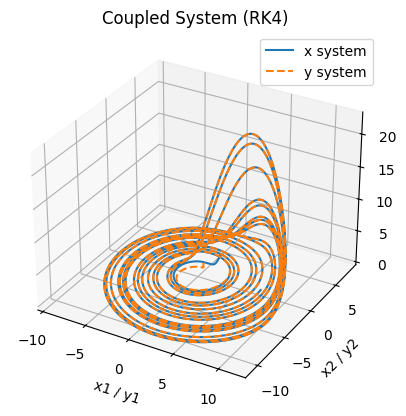

In [21]:
# Plotting results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(states[0:10000, 0], states[0:10000, 1], states[0:10000, 2], label='x system')
ax.plot(states[0:10000, 3], states[0:10000, 4], states[0:10000, 5], label='y system', linestyle='--')
ax.set_title('Coupled System (RK4)')
ax.set_xlabel('x1 / y1')
ax.set_ylabel('x2 / y2')
ax.set_zlabel('x3 / y3')
ax.legend()
plt.show()

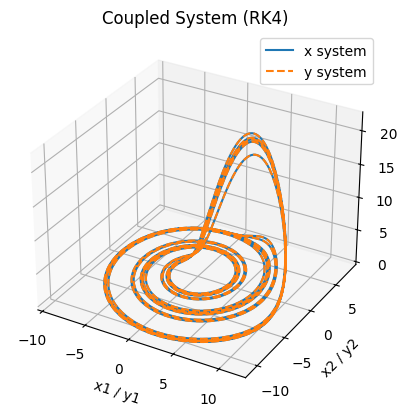

In [22]:
# Plotting results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(states[190000:200000, 0], states[190000:200000, 1], states[190000:200000, 2], label='x system')
ax.plot(states[190000:200000, 3], states[190000:200000, 4], states[190000:200000, 5], label='y system', linestyle='--')
ax.set_title('Coupled System (RK4)')
ax.set_xlabel('x1 / y1')
ax.set_ylabel('x2 / y2')
ax.set_zlabel('x3 / y3')
ax.legend()
plt.show()

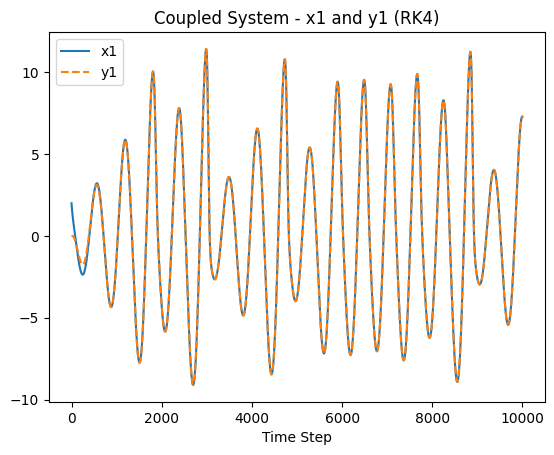

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(states[0:10000, 0], label='x1')
ax.plot(states[0:10000, 3], label='y1', linestyle='--')
ax.set_title('Coupled System - x1 and y1 (RK4)')
ax.set_xlabel('Time Step')
ax.legend()
plt.show()

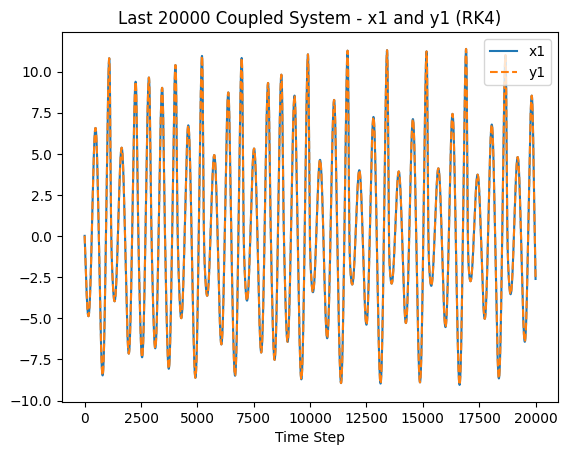

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(states[180000:200000, 0], label='x1')
ax.plot(states[180000:200000, 3], label='y1', linestyle='--')
ax.set_title('Last 20000 Coupled System - x1 and y1 (RK4)')
ax.set_xlabel('Time Step')
ax.legend()
plt.show()

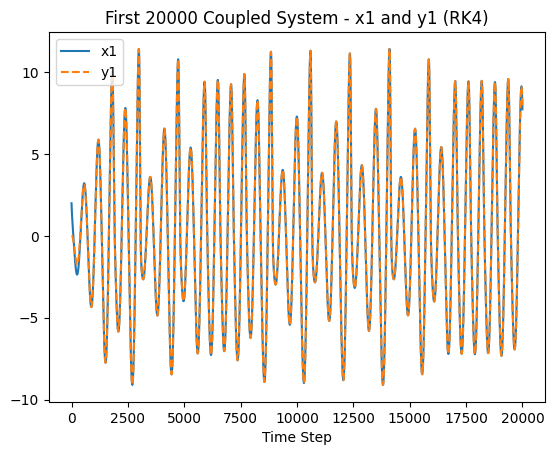

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(states[0:20000, 0], label='x1')
ax.plot(states[0:20000, 3], label='y1', linestyle='--')
ax.set_title('First 20000 Coupled System - x1 and y1 (RK4)')
ax.set_xlabel('Time Step')
ax.legend()
plt.show()